# Plot results


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

EXPERIMENT_FOR_MODEL = 4


age_inference_random_forest = pd.read_csv('./sample/age_inference_random_forest.csv', header=None)
age_inference_random_forest.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'roc auc'}, inplace=True)

age_inference_logistic_regression = pd.read_csv('./sample/age_inference_logistic_regression.csv', header=None)
age_inference_logistic_regression.rename(columns={0: 'dataset', 1: 'balanced acc', 2: 'f1', 3: 'precision', 4: 'recall', 5: 'roc auc'}, inplace=True)


### Age inference

* observation

In [2]:
observation_age_inference_random_forest = age_inference_random_forest.iloc[0].to_frame().tail(5)
observation_age_inference_random_forest.rename(columns={0: 'Random Forest'}, inplace=True)
observation_age_inference_logistic_regression = age_inference_logistic_regression.iloc[0].to_frame().tail(5)
observation_age_inference_logistic_regression.rename(columns={0: 'Logistic Regression'}, inplace=True)

observation_age_inference_random_forest_merged = pd.concat([observation_age_inference_random_forest,
                                                              observation_age_inference_logistic_regression], axis=1)

observation_age_inference_random_forest_merged = observation_age_inference_random_forest_merged

observation_age_inference_random_forest_merged

,Random Forest,Logistic Regression
balanced acc,0.999347,0.142857
f1,0.999333,0.239766
precision,0.999334,0.169195
recall,0.999333,0.411333
roc auc,0,0


Text(0.5, 0, 'Dataset')

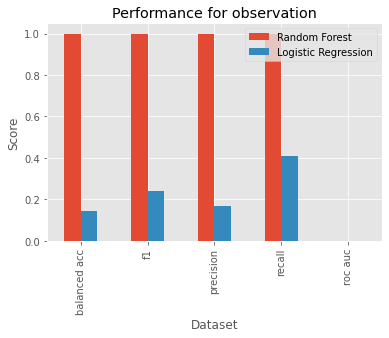

In [3]:
plt.style.use('ggplot')
observation_age_inference_random_forest_merged.plot(kind='bar')
plt.title('Performance for observation')
plt.ylabel('Score')
plt.xlabel('Dataset')


##### For each recommendation model show performance at each step of the pipeline



* user KNN


In [4]:
current_experiment = 0
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
userKNN_model_performance_random_forest = age_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
userKNN_model_performance_logistic_regression = age_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
userKNN_model_performance_random_forest

,index,dataset,balanced acc,f1,precision,recall,roc auc
0,1,user-knn_relevance,0.775071,0.813478,0.819310,0.814333,0
1,2,user-knn_classification_best_10,0.442243,0.533901,0.554289,0.547667,0
2,3,user-knn_classification_best_20,0.604351,0.687437,0.700780,0.692667,0
3,4,observation,0.999347,0.999333,0.999334,0.999333,0


In [5]:
metrics = ['balanced acc', 'f1', 'precision', 'recall', 'roc auc']

def perform_plot(random_forest, logistic_regression, metric, model_name):
    plt.figure()
    plt.style.use('ggplot')
    random_forest[metric].plot(kind='line')
    logistic_regression[metric].plot(kind='line')
    plt.title(metric + ' in ' + model_name + ' pipeline')
    indices = range(random_forest.shape[0])
    labels = random_forest['dataset'].to_list()
    plt.xticks(indices, labels, rotation=90)


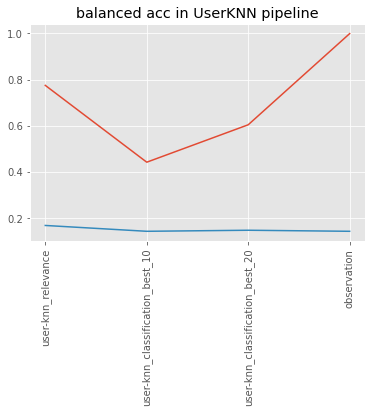

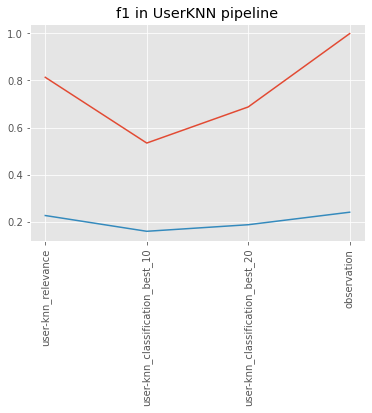

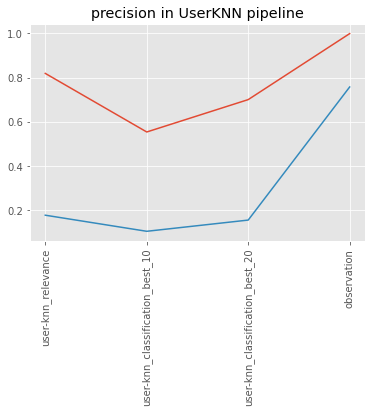

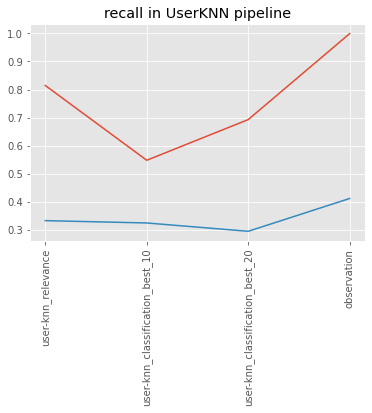

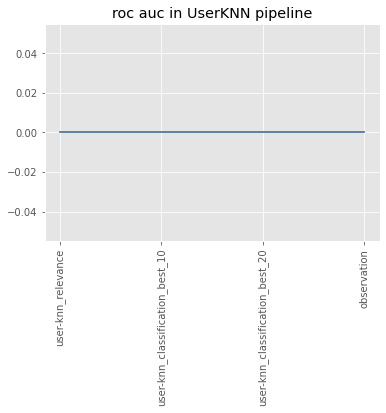

In [6]:
for m in metrics:
    perform_plot(userKNN_model_performance_random_forest, userKNN_model_performance_logistic_regression, m, 'UserKNN')

* item KNN

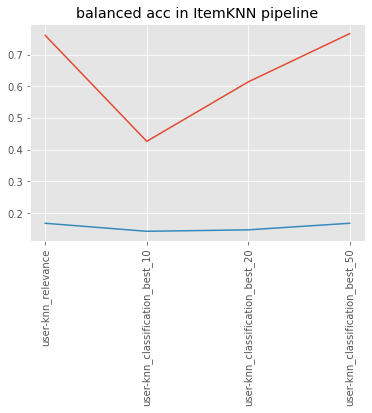

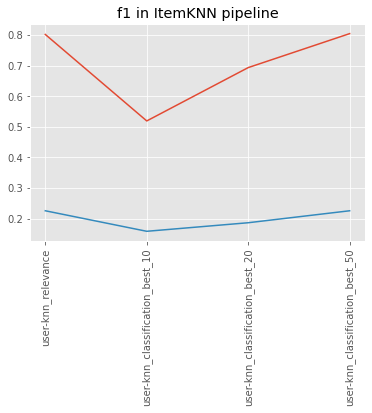

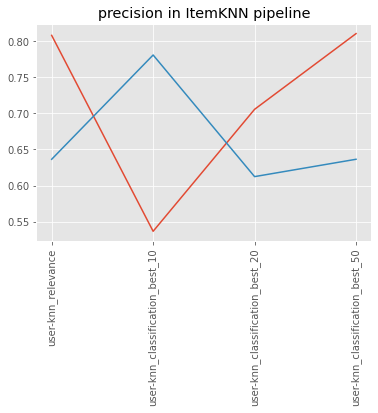

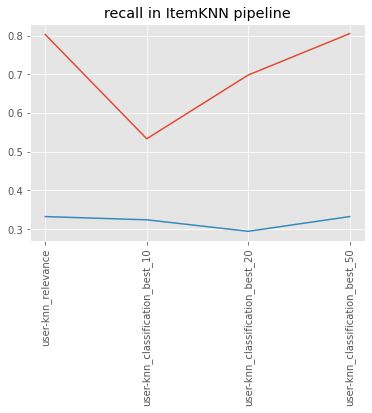

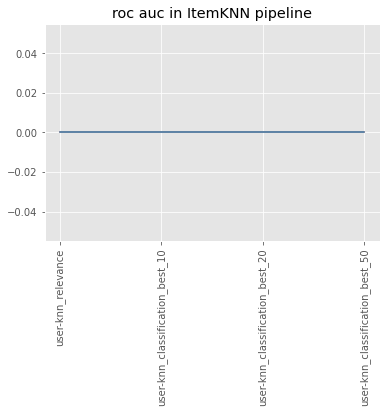

In [7]:
current_experiment = 1
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
itemKNN_model_performance_random_forest = age_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
itemKNN_model_performance_logistic_regression = age_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(itemKNN_model_performance_random_forest, itemKNN_model_performance_logistic_regression, m, 'ItemKNN')

* most popular

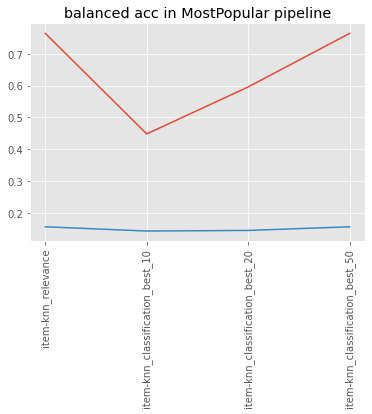

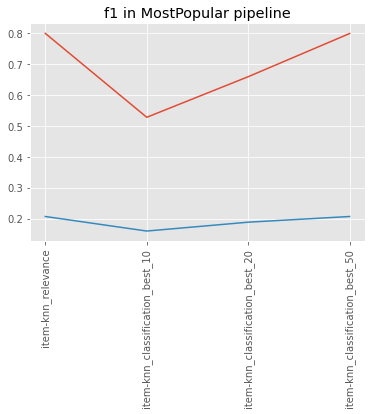

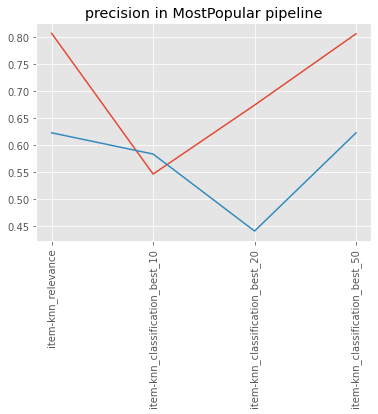

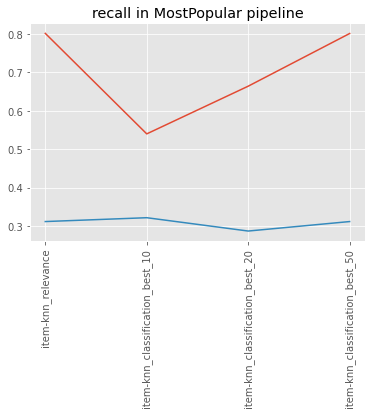

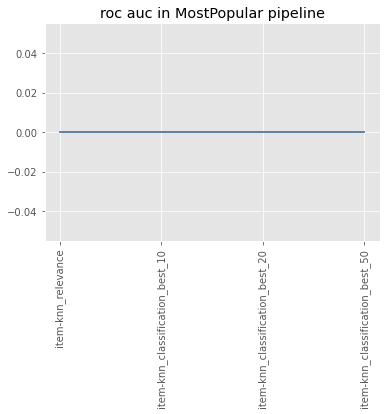

In [8]:
current_experiment = 2
first_item = 1 + EXPERIMENT_FOR_MODEL * current_experiment
most_pop_model_performance_random_forest = age_inference_random_forest.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()
most_pop_model_performance_logistic_regression = age_inference_logistic_regression.iloc[first_item:first_item+EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(most_pop_model_performance_random_forest, most_pop_model_performance_logistic_regression, m, 'MostPopular')

##### For each step of the pipeline show performance of recommendation models

* relevance

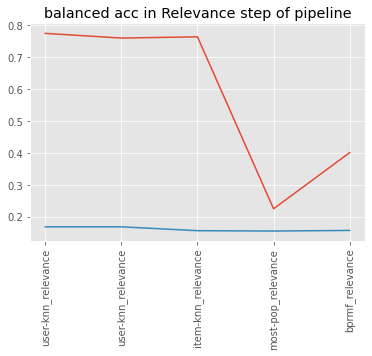

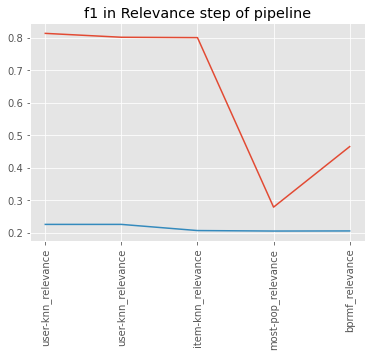

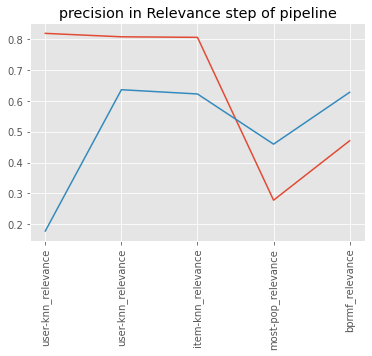

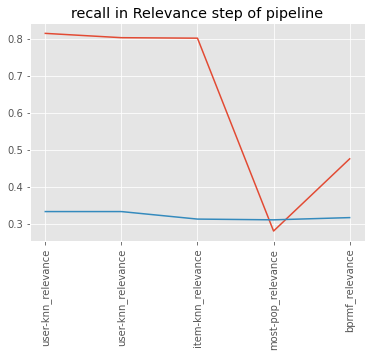

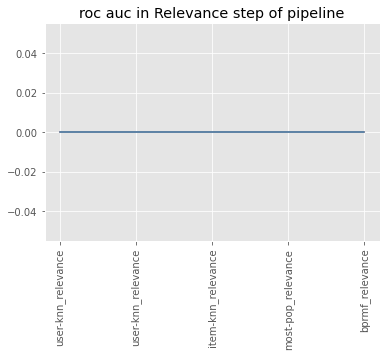

In [9]:
current_step = 0
first_item = 1 + current_step
relevance_random_forest = age_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
relevance_logistic_regression = age_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(relevance_random_forest, relevance_logistic_regression, m, 'Relevance step of')

* classification best 10

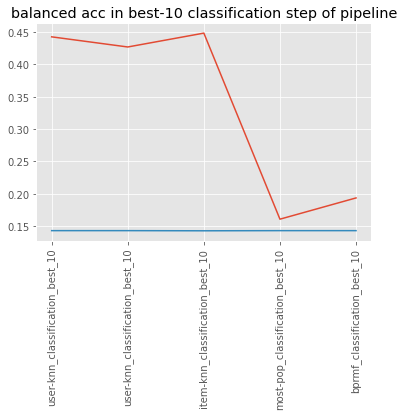

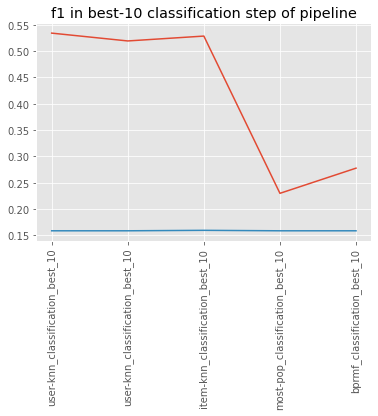

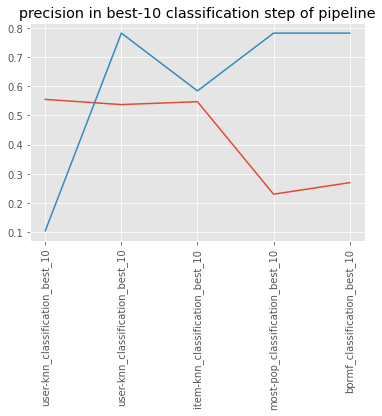

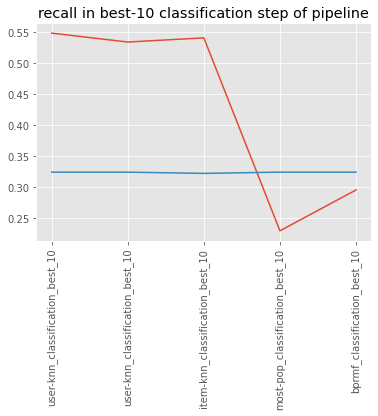

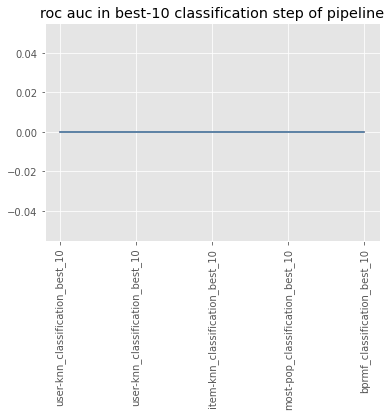

In [10]:
current_step = 1
first_item = 1 + current_step
best10_random_forest = age_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
best10_logistic_regression = age_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(best10_random_forest, best10_logistic_regression, m, 'best-10 classification step of')

classification best 20

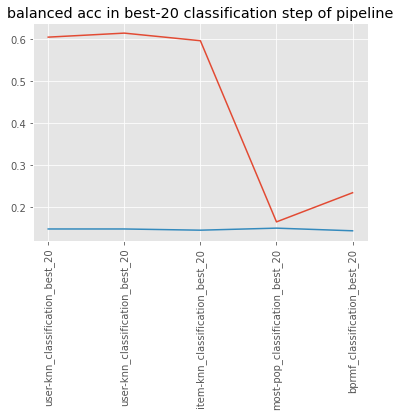

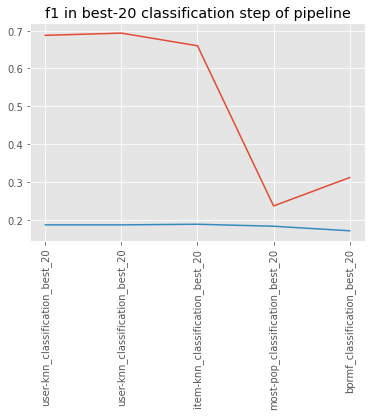

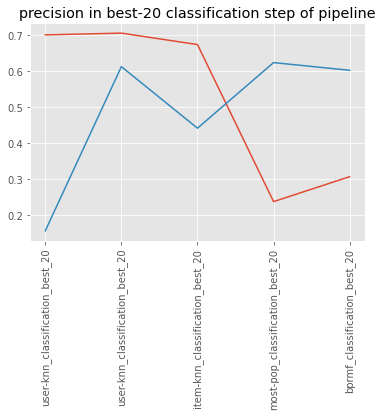

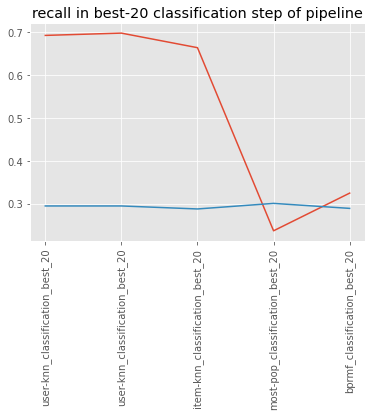

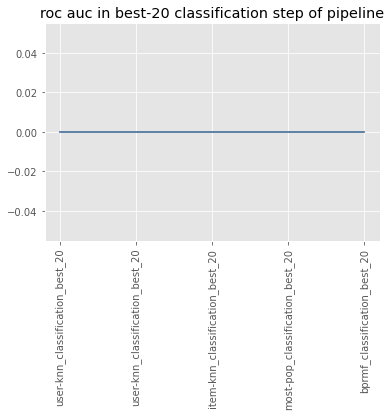

In [11]:
current_step = 2
first_item = 1 + current_step
best20_random_forest = age_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
best20_logistic_regression = age_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(best20_random_forest, best20_logistic_regression, m, 'best-20 classification step of')

* classification best 50

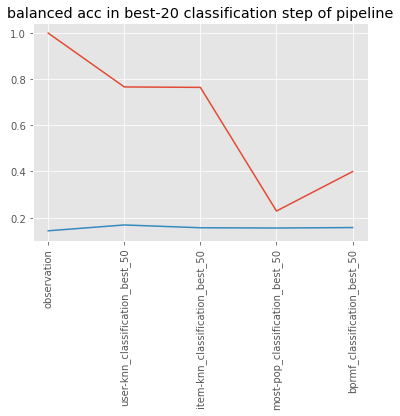

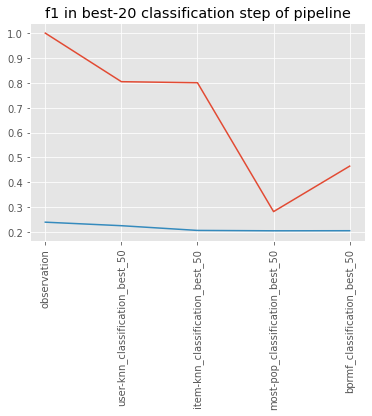

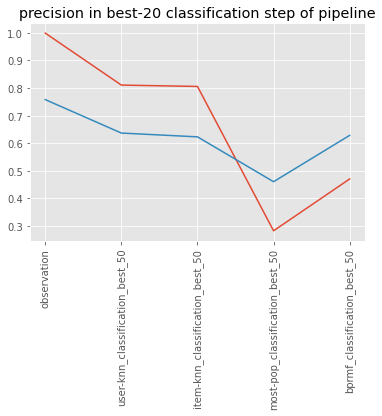

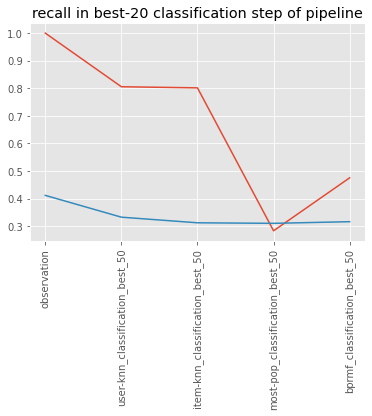

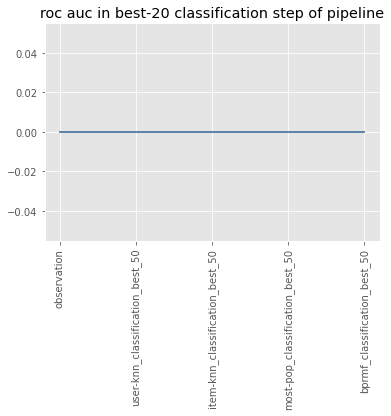

In [12]:

current_step = 3
first_item = 1 + current_step
best50_random_forest = age_inference_random_forest.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()
best50_logistic_regression = age_inference_logistic_regression.iloc[first_item::EXPERIMENT_FOR_MODEL,:].reset_index()

for m in metrics:
    perform_plot(best50_random_forest, best50_logistic_regression, m, 'best-20 classification step of')
